https://youtu.be/VVsiQIwcEKc?si=MR8rcSnlYihKZ8uI

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/data-export.csv')

In [ ]:
df = pd.read_csv('/content/data-export.csv')
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


Using PANDAS to clean data

Removed the first unnamed column

In [ ]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


Making column 0 as header, dropping column 0, reseting indexes

In [ ]:
df.columns = df.iloc[0]
df = df.drop(index =0).reset_index(drop=True)
df.columns = ['channel grp', 'DateHour', 'Users',	'Sessions',	'Engaged sessions',	'Average engagement time per session',	'Engaged sessions per user',	'Events per session',	'Engagement rate',	'Event count']
df.head()

,channel grp,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [ ]:
# Checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel grp                          3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


Data type is wrong from users->event count, covert object -> numerical

Converting DateHour(object) -> Date Hour Format

In [ ]:
df.DateHour = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors = 'coerce')
# errors='coerce' -> If a value cannot be converted → set it as NaT
df.head()

,channel grp,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


Coverting User -> EventCount (object -> numeric)

In [ ]:
numeric_cols = df.drop(columns = ['channel grp', 'DateHour']).columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors = 'coerce')
# Creating new column as hour
df['Hour'] = df["DateHour"].dt.hour

In [ ]:
df.head()

,channel grp,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel grp                          3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [ ]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


Using SeaBorn and matplotlib to visualize data

Relation bw sessions and user over time

Q1. What patterns trends you observe in website sessions and users over time

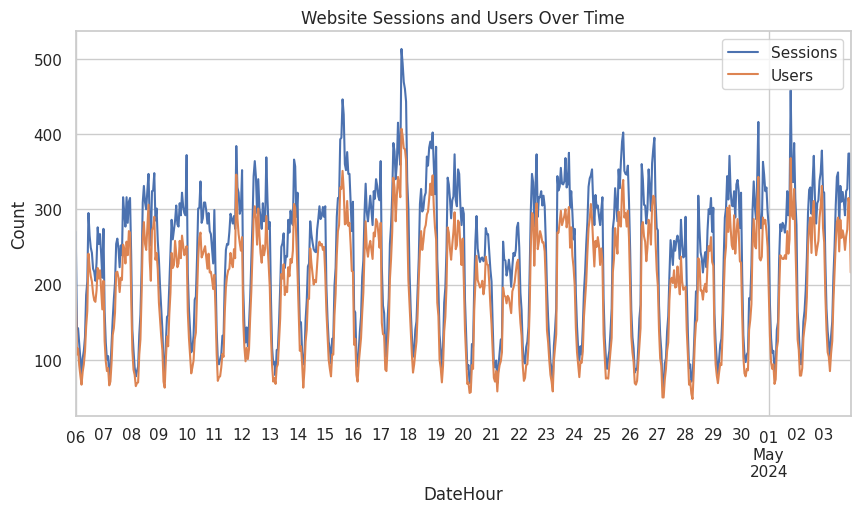

In [22]:
sns.set(style = "whitegrid")

plt.figure(figsize = (10,5))
df.groupby ("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
# df.groupby("DateHour") -> Group all rows that have the same DateHour value together
# [["Sessions","Users"]] -> From each DateHour group, keep only these two columns
# .sum() -> For each DateHour group, add up Sessions and Users
# .plot(...) Draw a graph using the result of the sum()
# ax = plt.gca() -> Draw this plot on the current axes

plt.title("Website Sessions and Users Over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.savefig("PatterTrend.png", dpi=300, bbox_inches='tight')
plt.show()

Q2. Which marketing channel brought the highest numbers of users to the website and how can we use this inshight to improve from other sources ?

Total users by channel

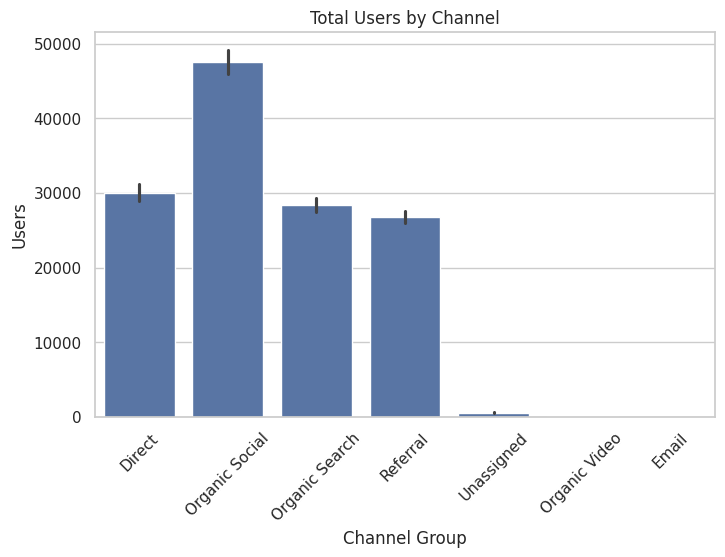

In [23]:
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = "channel grp", y = "Users", estimator = np.sum)
plt.title("Total Users by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Users")
plt.xticks (rotation = 45) #It will rotate x axis's headings by 45deg
plt.savefig("TotalUser.png", dpi=300, bbox_inches='tight')
plt.show()

Q3.Which Channel has the highest average engagement time, And what does that tell us about user behaviour and content effectiveness?

Avg Engagement time by channel and Users

/tmp/ipython-input-2629501824.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "channel grp", y = "Average engagement time per session", estimator = np.mean, palette = "magma"  )


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Direct'),
  Text(1, 0, 'Organic Social'),
  Text(2, 0, 'Organic Search'),
  Text(3, 0, 'Referral'),
  Text(4, 0, 'Unassigned'),
  Text(5, 0, 'Organic Video'),
  Text(6, 0, 'Email')])

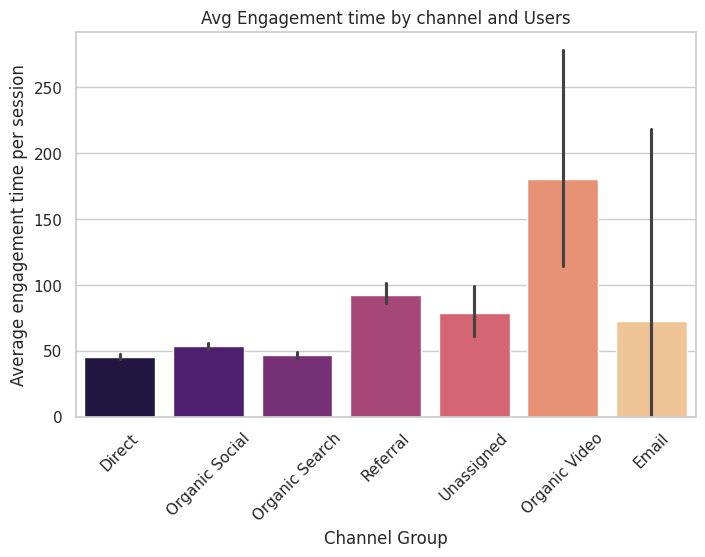

In [24]:
plt.figure(figsize = (8,5))
sns.barplot(data = df, x = "channel grp", y = "Average engagement time per session", estimator = np.mean, palette = "magma"  )
plt.title("Avg Engagement time by channel and Users")
plt.xlabel("Channel Group")
plt.ylabel("Average engagement time per session")
plt.savefig("AvgEngagementTime.png", dpi=300, bbox_inches='tight')
plt.xticks (rotation = 45)

Q4. How does the engagement rate vary accross different traffic channels ?

Engagement Rate distribution by Channel

Channel Grp and Engagement Rate

/tmp/ipython-input-2127713997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "channel grp", y = "Engagement rate", palette = "coolwarm")


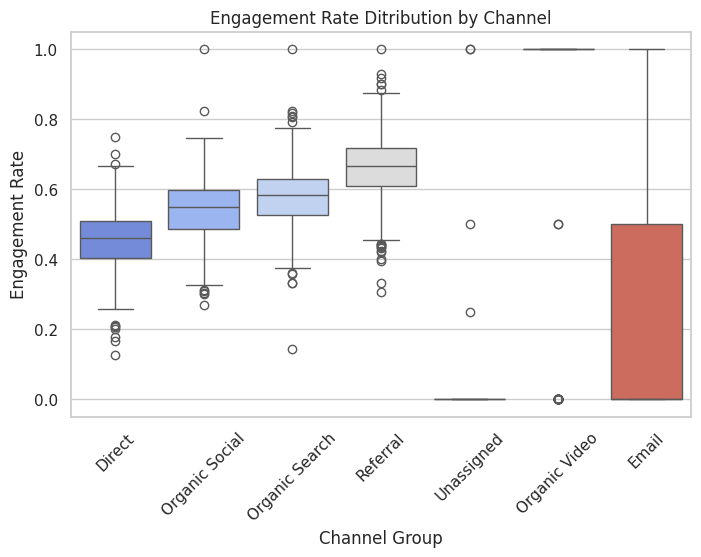

In [25]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df, x = "channel grp", y = "Engagement rate", palette = "coolwarm")
plt.title("Engagement Rate Ditribution by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks (rotation = 45)
plt.savefig("EngagementRateVariation.png", dpi=300, bbox_inches='tight')
plt.show()

Q5.Which channels are driving more engaged sessions compared to non-engaged ones & what strategies can improve engagement in underperforming channels ?

Engeged va Non Engaged Sessions

Engaged column is given, to get Non-engage = Total - Engage

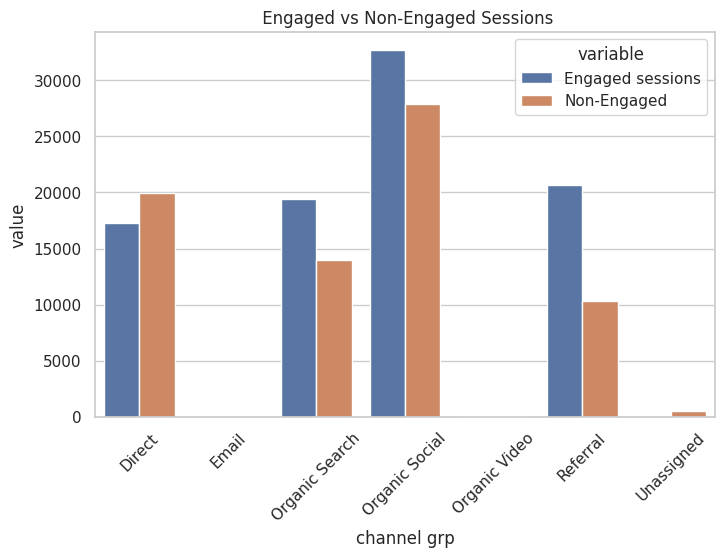

In [26]:
session_df = df.groupby("channel grp") [["Sessions", "Engaged sessions"]].sum().reset_index()

session_df[ "Non-Engaged"] = session_df ["Sessions"] - session_df["Engaged sessions"]
# Non-engage = Total - Engage

session_df_melted =session_df.melt(id_vars="channel grp", value_vars=["Engaged sessions", "Non-Engaged"])


plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel grp", y="value", hue="variable")
plt.title(" Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.savefig("NonEngagedChl.png", dpi=300, bbox_inches='tight')
plt.show()

Q6. At what hours of the day does each channel drive the most traffic ?

Traffic by hour and channel

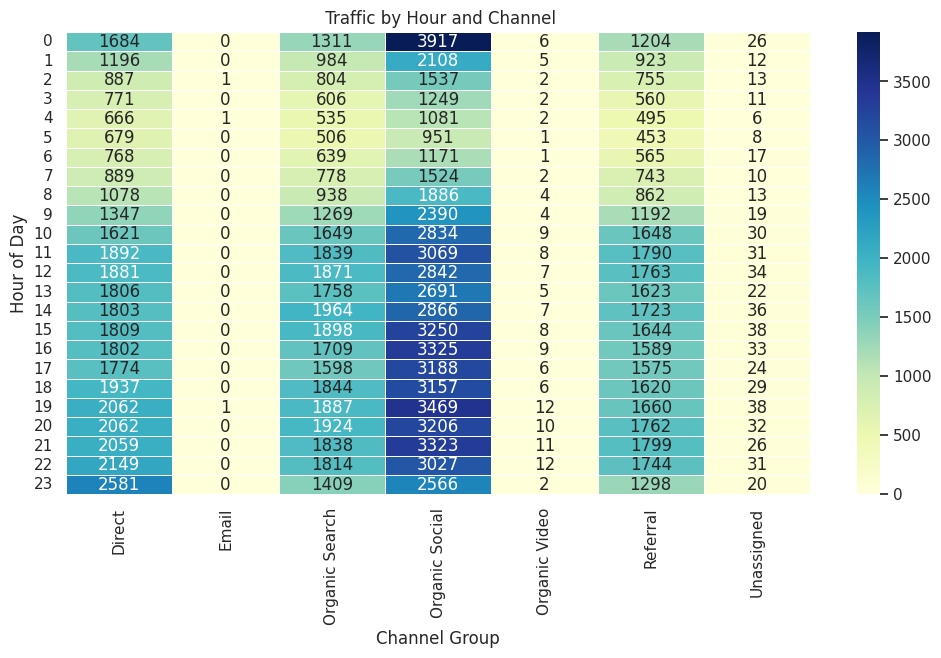

In [27]:
# Use heat map
heatmap_data = df.groupby(["Hour", "channel grp"]) ["Sessions"].sum().unstack(). fillna(0)
# ["Sessions"].sum() -> For each (Hour, Channel Group) pair, total number of sessions is calculated.
# .fillna(0) -> If a channel had no sessions in a certain hour, it becomes 0 instead of NaN.
#               Heatmaps hate missing values 😄

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
# annot=True -> Writes actual numbers inside each cell
# fmt='.0f' -> No decimals (sessions are whole numbers)
plt.title(" Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")

plt.savefig("TrafficPerHr.png", dpi=300, bbox_inches='tight')
plt.show()

Q7.Is there any correlation between high traffic (sessions) and high engagement rate over time ?

Engagement Rate VS Sessions over time

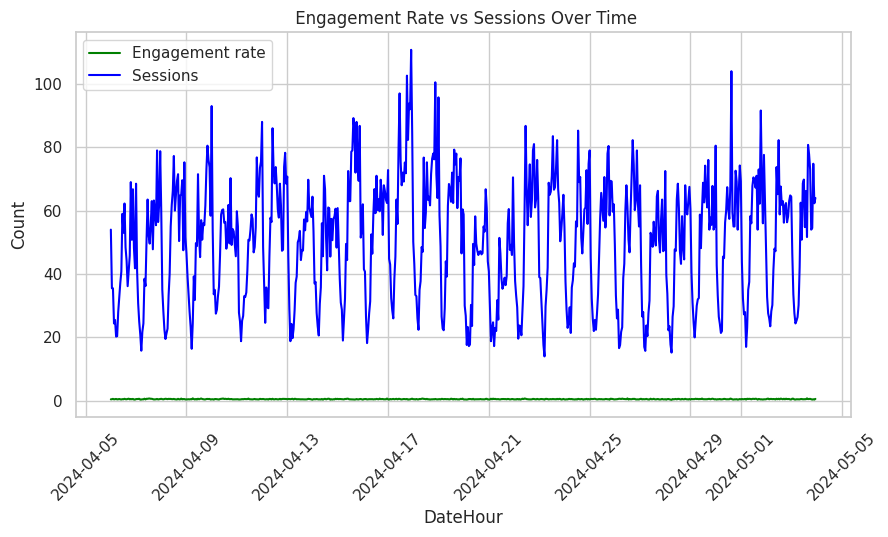

In [28]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))

plt.plot(df_plot ["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot ["Sessions"], label="Sessions", color="blue")
plt.title(" Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.legend()
plt.grid(True)

plt.savefig("EngagementVSSessions.png", dpi=300, bbox_inches='tight')
plt.show()